In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
sns.set()

In [2]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [3]:
# Carregando dataset
alcohol_consumption = pd.read_csv('../databases/student-mat.zip', compression='zip')
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Trends

### Média de consumo de álcool por idade

C:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


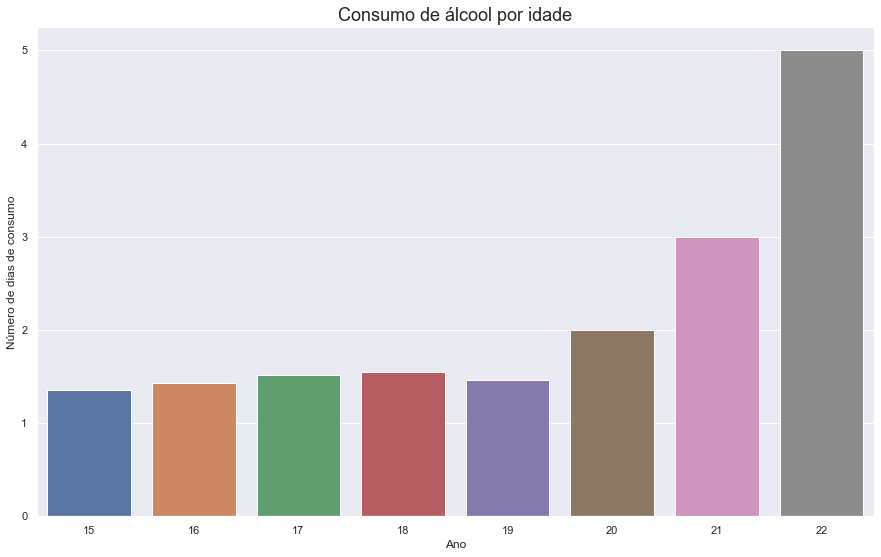

In [4]:
a_per_year = (alcohol_consumption.groupby('age')
              .agg({'Dalc': 'mean'})
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

sns.barplot(
    a_per_year['age'],
    a_per_year['alc_consump'],
)

# Título do plot
plt.title("Consumo de álcool por idade", fontsize=18)
# Nome do eixo x
plt.xlabel('Ano')
# Nome do eixo y
plt.ylabel('Número de dias de consumo')
plt.show()

### Consumo de álcool por gênero

C:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


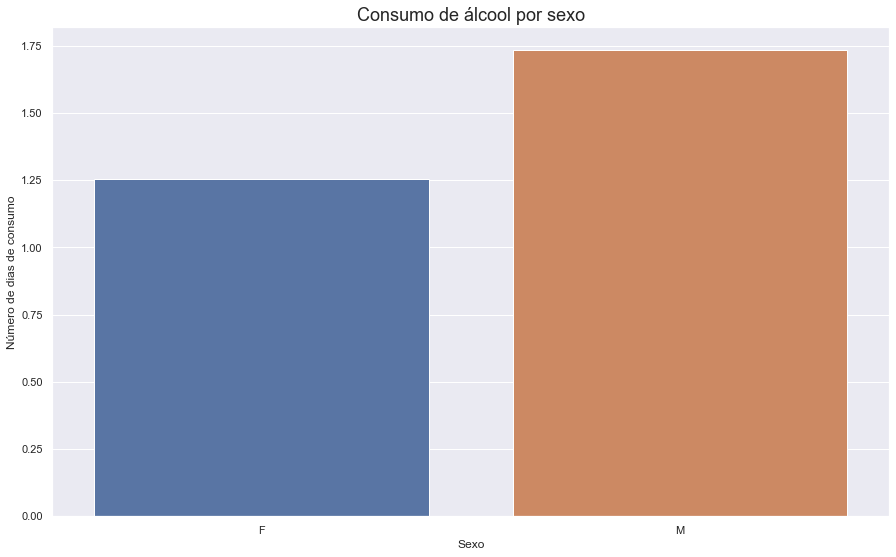

In [5]:
a_per_year = (alcohol_consumption.groupby('sex')
              .agg({'Dalc': 'mean'})
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

sns.barplot(
    a_per_year['sex'],
    a_per_year['alc_consump'],
)

# Título do plot
plt.title("Consumo de álcool por sexo", fontsize=18)
# Nome do eixo x
plt.xlabel('Sexo')
# Nome do eixo y
plt.ylabel('Número de dias de consumo')
plt.show()

### Idade dos envolvidos

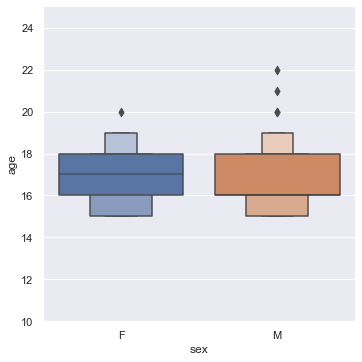

In [6]:
ax = sns.catplot(x="sex", y="age",
            kind="boxen", data=alcohol_consumption);

# Limita os valores dos eixos
ax.set(ylim=(10, 25))

plt.show()

### Consumo de álcool por status de coabitação dos pais

Boxplots no consumo de álcool em dias de semana e finais e semana tanto para pais separados (A) e que moram juntos (T)

array([<AxesSubplot:title={'center':'Dalc'}, xlabel='Pstatus'>,
       <AxesSubplot:title={'center':'Walc'}, xlabel='Pstatus'>],
      dtype=object)

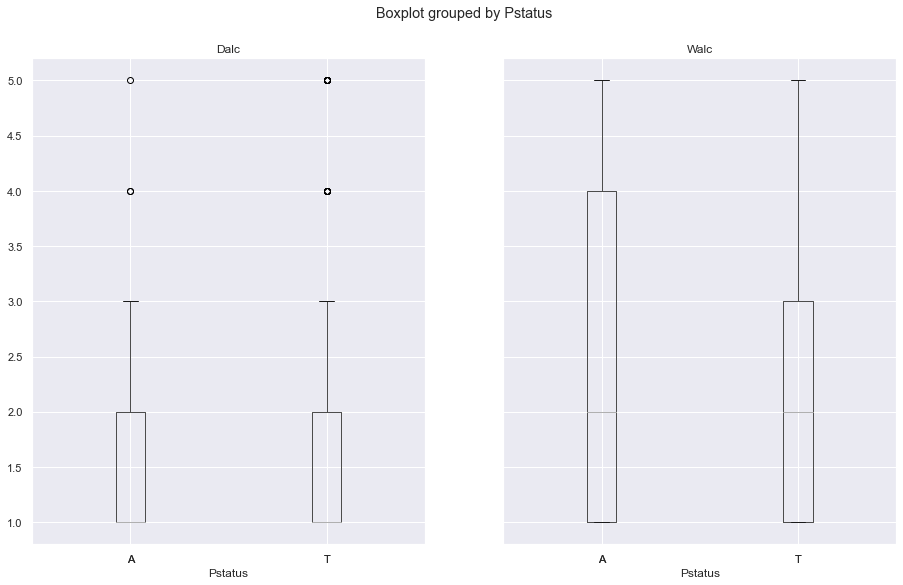

In [7]:
# Boxplot dos valores
alcohol_consumption.boxplot(column=['Dalc', 'Walc'], by='Pstatus')

Comparação da média de consumo de álcool entre alunos com pais que moram juntos ou separados, para consumo em dias da semana e finais de semana

<AxesSubplot:xlabel='Pstatus'>

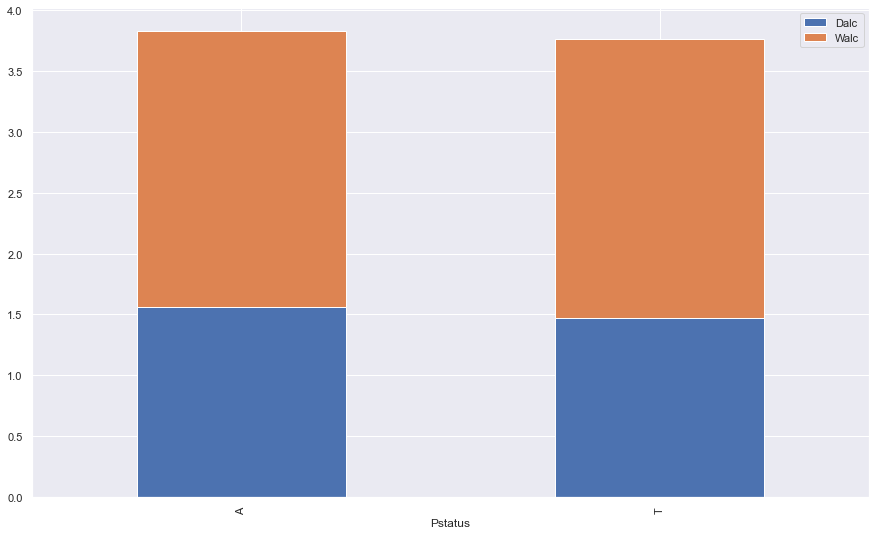

In [8]:
# Gráfico de barras com a média para consumos 
alcohol_consumption.groupby('Pstatus')[['Dalc', 'Walc']].aggregate('mean').plot.bar(by='Pstatus', stacked=True)

### Consumo de álcool para frequência que um aluno sai com os amigos

Para cada nível de frequência que um aluno sai com seus amigos, verificamos a distribuição do consumos de álcool entre os alunos que se encaixam no grupo através de um boxplot

array([<AxesSubplot:title={'center':'Dalc'}, xlabel='goout'>,
       <AxesSubplot:title={'center':'Walc'}, xlabel='goout'>],
      dtype=object)

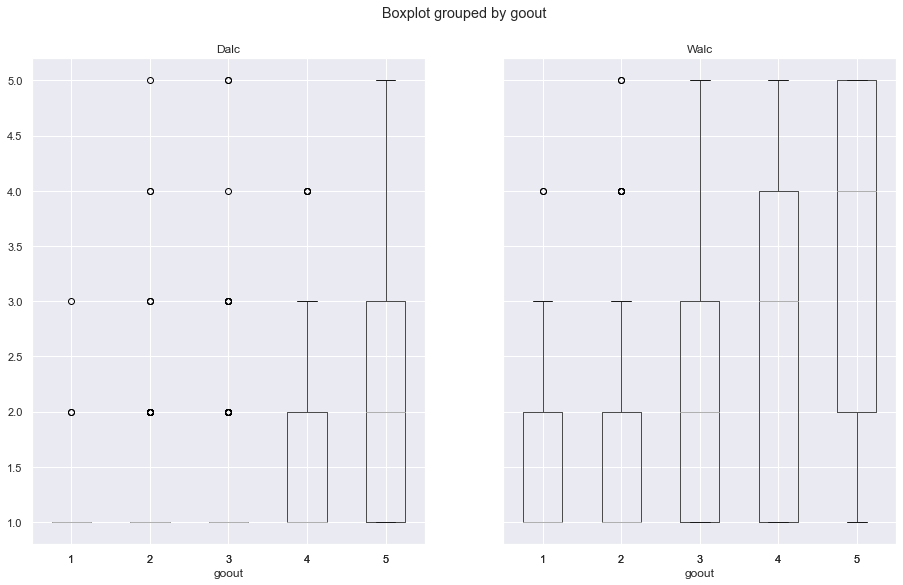

In [41]:
alcohol_consumption.boxplot(column=['Dalc', 'Walc'], by='goout')

Verificamos como a média do consumo de álcool varia em relação a quanto um aluno sai com seus amigos

<AxesSubplot:xlabel='goout'>

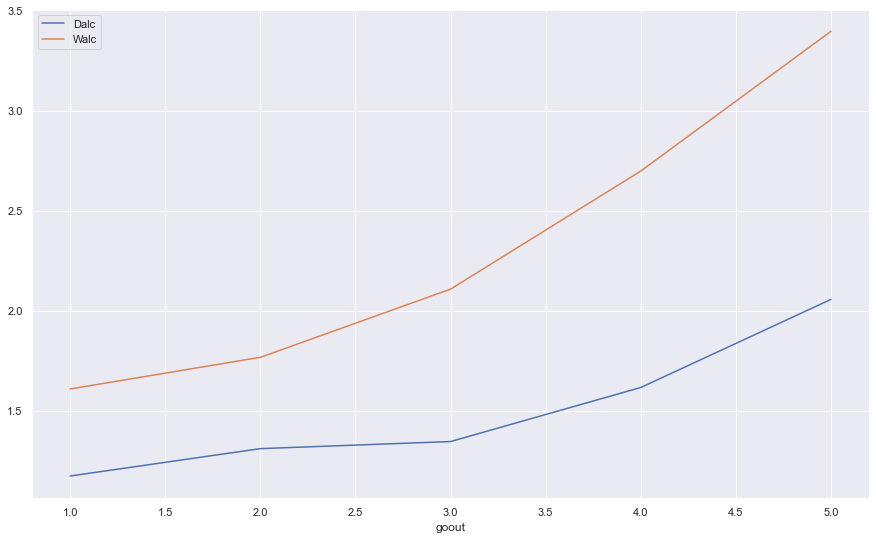

In [42]:
alcohol_consumption.groupby('goout', as_index=False)[['Dalc', 'Walc']].aggregate('mean').plot.line(x='goout')